In [1]:
import numpy as np
import pandas as pd

In [2]:

# Chỉ định mã hóa chính xác 
all_data_cleaned = pd.read_csv('data_2024_final.csv')

# Hiển thị DataFrame
all_data_cleaned


,DATE,YEAR,MONTH,DAY,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,T2M,T2MDEW,...,WS2M_MIN,WS2M_RANGE,WD2M,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,GWETTOP,TS_1_DAY_AFTER
0,2000-01-01,2000,1,1,10.020000,12.74000,24.900000,58.100000,18.44,16.31,...,0.58,0.77,103.75,1.54,2.78,0.81,1.97,103.88,0.700000,18.09
1,2000-01-02,2000,1,2,11.610000,13.31000,24.940000,67.200000,18.40,15.85,...,0.41,1.52,94.69,1.92,2.53,0.66,1.87,94.81,0.700000,17.78
2,2000-01-03,2000,1,3,15.350000,16.13000,25.000000,86.600000,18.08,15.08,...,0.17,2.12,178.38,2.04,3.21,0.22,3.00,178.50,0.700000,18.77
3,2000-01-04,2000,1,4,7.720000,9.92000,25.060000,44.800000,18.84,17.00,...,0.77,2.92,161.62,3.16,5.21,1.44,3.78,161.12,0.700000,20.99
4,2000-01-05,2000,1,5,11.030000,11.76000,25.120000,63.300000,20.69,18.66,...,0.80,2.64,150.00,2.80,5.08,0.99,4.09,150.38,0.700000,21.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35694,2024-06-02,2024,6,2,21.170000,21.33752,39.610000,74.028704,29.73,26.36,...,0.24,2.02,164.62,2.05,3.52,0.30,3.22,164.75,0.708686,29.90
35695,2024-06-03,2024,6,3,20.970000,21.33752,39.620000,74.028704,29.77,26.07,...,0.33,1.12,218.19,1.67,2.26,0.52,1.73,219.12,0.708686,29.52
35696,2024-06-04,2024,6,4,14.420000,21.33752,39.630000,74.028704,29.42,26.80,...,0.30,1.12,83.00,1.44,2.32,0.59,1.73,83.06,0.708686,27.69
35697,2024-06-05,2024,6,5,13.475334,21.33752,33.640511,74.028704,27.80,26.14,...,0.84,2.73,69.25,3.20,5.08,1.63,3.44,69.56,0.708686,25.83


In [3]:
# Xác định biến đặc trưng (features) và biến mục tiêu (target)
X = all_data_cleaned.drop(columns=['TS_1_DAY_AFTER','DATE'])
y = all_data_cleaned['TS_1_DAY_AFTER']

In [4]:
from sklearn.preprocessing import StandardScaler

# Chọn ra các cột mà bạn muốn chuẩn hóa (loại bỏ 'TS_TODAY' khỏi danh sách)
columns_to_scale = X.columns.difference(['TS_TODAY'])

# Khởi tạo scaler cho biến đặc trưng và biến mục tiêu
scaler_X = StandardScaler()

# Chuẩn hóa dữ liệu đặc trưng (biến độc lập) chỉ cho các cột cần chuẩn hóa
X[columns_to_scale] = scaler_X.fit_transform(X[columns_to_scale])

# In ra X sau khi chuẩn hóa
X

,YEAR,MONTH,DAY,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,T2M,T2MDEW,T2MWET,...,WS2M_MAX,WS2M_MIN,WS2M_RANGE,WD2M,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,GWETTOP
0,-1.66105,-1.581977,-1.672244,-5.960236e-01,-2.084428,-1.629133,-0.507214,-0.898737,-0.600111,-0.750637,...,-1.530065,-0.270460,-1.687830,-0.578550,-1.207186,-0.966569,-0.599203,-0.824405,-0.575876,-9.057155e-02
1,-1.66105,-1.581977,-1.558643,-3.217585e-01,-1.946234,-1.621678,-0.217445,-0.906166,-0.678529,-0.795483,...,-0.997965,-0.683397,-0.859210,-0.743057,-0.788872,-1.135951,-0.808536,-0.907076,-0.740383,-9.057155e-02
2,-1.66105,-1.581977,-1.445042,3.233682e-01,-1.262539,-1.610494,0.400305,-0.965603,-0.809793,-0.892351,...,-0.652566,-1.266367,-0.196315,0.776543,-0.656772,-0.675232,-1.422582,0.027100,0.777543,-9.057155e-02
3,-1.66105,-1.581977,-1.331441,-9.927593e-01,-2.768124,-1.599311,-0.930723,-0.824440,-0.482485,-0.651975,...,0.663682,0.191058,0.687546,0.472223,0.576153,0.679822,0.279999,0.671929,0.462313,-9.057155e-02
4,-1.66105,-1.581977,-1.217841,-4.218049e-01,-2.322025,-1.588128,-0.341632,-0.480820,-0.199501,-0.338051,...,0.430305,0.263929,0.378195,0.261234,0.179855,0.591744,-0.348002,0.928208,0.267517,-9.057155e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35694,1.74003,-0.133982,-1.558643,1.327282e+00,0.000000,1.112646,0.000000,1.198274,1.113139,1.163402,...,-0.680571,-1.096334,-0.306797,0.526696,-0.645764,-0.465199,-1.310937,0.208975,0.528152,1.157683e-15
35695,1.74003,-0.133982,-1.445042,1.292783e+00,0.000000,1.114510,0.000000,1.205704,1.063702,1.141875,...,-1.427379,-0.877720,-1.301141,1.499392,-1.064078,-1.318883,-1.003914,-1.022814,1.514287,1.157683e-15
35696,1.74003,-0.133982,-1.331441,1.629490e-01,0.000000,1.116374,0.000000,1.140695,1.188147,1.177752,...,-1.474054,-0.950592,-1.301141,-0.955318,-1.317268,-1.278231,-0.906225,-1.022814,-0.953499,1.157683e-15
35697,1.74003,-0.133982,-1.217841,-6.128210e-16,0.000000,0.000000,0.000000,0.839795,1.075635,0.971460,...,0.542326,0.361091,0.477629,-1.204983,0.620186,0.591744,0.545154,0.390850,-1.198355,1.157683e-15


In [5]:
X

,YEAR,MONTH,DAY,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,TOA_SW_DWN,ALLSKY_SFC_PAR_TOT,T2M,T2MDEW,T2MWET,...,WS2M_MAX,WS2M_MIN,WS2M_RANGE,WD2M,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,GWETTOP
0,-1.66105,-1.581977,-1.672244,-5.960236e-01,-2.084428,-1.629133,-0.507214,-0.898737,-0.600111,-0.750637,...,-1.530065,-0.270460,-1.687830,-0.578550,-1.207186,-0.966569,-0.599203,-0.824405,-0.575876,-9.057155e-02
1,-1.66105,-1.581977,-1.558643,-3.217585e-01,-1.946234,-1.621678,-0.217445,-0.906166,-0.678529,-0.795483,...,-0.997965,-0.683397,-0.859210,-0.743057,-0.788872,-1.135951,-0.808536,-0.907076,-0.740383,-9.057155e-02
2,-1.66105,-1.581977,-1.445042,3.233682e-01,-1.262539,-1.610494,0.400305,-0.965603,-0.809793,-0.892351,...,-0.652566,-1.266367,-0.196315,0.776543,-0.656772,-0.675232,-1.422582,0.027100,0.777543,-9.057155e-02
3,-1.66105,-1.581977,-1.331441,-9.927593e-01,-2.768124,-1.599311,-0.930723,-0.824440,-0.482485,-0.651975,...,0.663682,0.191058,0.687546,0.472223,0.576153,0.679822,0.279999,0.671929,0.462313,-9.057155e-02
4,-1.66105,-1.581977,-1.217841,-4.218049e-01,-2.322025,-1.588128,-0.341632,-0.480820,-0.199501,-0.338051,...,0.430305,0.263929,0.378195,0.261234,0.179855,0.591744,-0.348002,0.928208,0.267517,-9.057155e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35694,1.74003,-0.133982,-1.558643,1.327282e+00,0.000000,1.112646,0.000000,1.198274,1.113139,1.163402,...,-0.680571,-1.096334,-0.306797,0.526696,-0.645764,-0.465199,-1.310937,0.208975,0.528152,1.157683e-15
35695,1.74003,-0.133982,-1.445042,1.292783e+00,0.000000,1.114510,0.000000,1.205704,1.063702,1.141875,...,-1.427379,-0.877720,-1.301141,1.499392,-1.064078,-1.318883,-1.003914,-1.022814,1.514287,1.157683e-15
35696,1.74003,-0.133982,-1.331441,1.629490e-01,0.000000,1.116374,0.000000,1.140695,1.188147,1.177752,...,-1.474054,-0.950592,-1.301141,-0.955318,-1.317268,-1.278231,-0.906225,-1.022814,-0.953499,1.157683e-15
35697,1.74003,-0.133982,-1.217841,-6.128210e-16,0.000000,0.000000,0.000000,0.839795,1.075635,0.971460,...,0.542326,0.361091,0.477629,-1.204983,0.620186,0.591744,0.545154,0.390850,-1.198355,1.157683e-15


In [6]:
y

0        18.09
1        17.78
2        18.77
3        20.99
4        21.56
         ...  
35694    29.90
35695    29.52
35696    27.69
35697    25.83
35698    27.65
Name: TS_1_DAY_AFTER, Length: 35699, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split
# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=40)
# Chia tập còn lại thành tập kiểm tra và tập validation với stratify=y_temp
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=40)

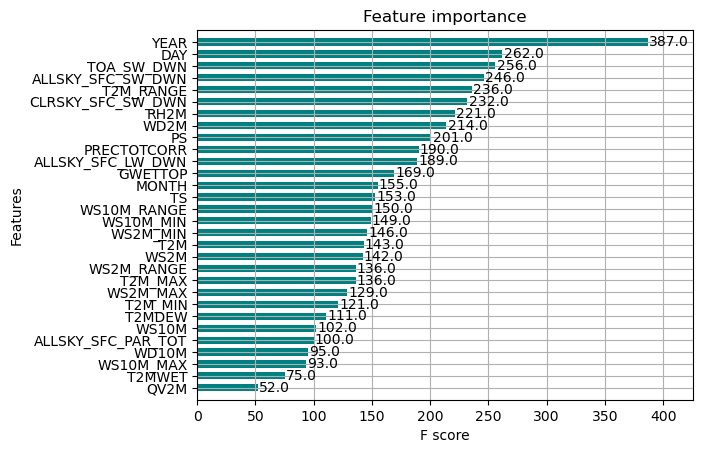

In [6]:
from xgboost import XGBRegressor
from xgboost import plot_importance
from matplotlib import pyplot as plt

# fit model on training data
model = XGBRegressor()
model.fit(X, y)

# plot feature importance
plot_importance(model, max_num_features=32, color='teal', height=0.6)
plt.show()


In [7]:
import numpy as np
import warnings
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectFromModel

# Tắt cảnh báo liên quan đến tên đặc trưng
warnings.filterwarnings("ignore", category=UserWarning)

# Huấn luyện mô hình trên toàn bộ dữ liệu huấn luyện
model = XGBRegressor(tree_method='hist', device='cuda')
model.fit(X_train, y_train)

# Lấy tên các đặc trưng
feature_names = X_train.columns

# Khởi tạo một danh sách để lưu trữ độ quan trọng của các đặc trưng
feature_importances = model.feature_importances_

# Sắp xếp các giá trị độ quan trọng theo thứ tự giảm dần
sorted_indices = np.argsort(feature_importances)[::-1]

# Lặp qua các ngưỡng và chọn ngưỡng tốt nhất
best_threshold = 0
best_adj_r2_train = -np.inf
best_adj_r2_val = -np.inf
best_adj_r2_test = -np.inf
for thresh in feature_importances[sorted_indices]:
    # Chọn các đặc trưng sử dụng ngưỡng
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    select_X_val = selection.transform(X_val)
    select_X_test = selection.transform(X_test)
    
    # Huấn luyện mô hình
    selection_model = XGBRegressor(tree_method='hist', device='cuda')
    selection_model.fit(select_X_train, y_train)
    
    # Đánh giá mô hình trên tập validation
    predictions_val = selection_model.predict(select_X_val)
    r2_val = r2_score(y_val, predictions_val)
    n_samples_val = select_X_val.shape[0]
    n_features_val = select_X_val.shape[1]
    adj_r2_val = 1 - (1 - r2_val) * (n_samples_val - 1) / (n_samples_val - n_features_val - 1)
    
    # Đánh giá mô hình trên tập huấn luyện
    predictions_train = selection_model.predict(select_X_train)
    r2_train = r2_score(y_train, predictions_train)
    n_samples_train = select_X_train.shape[0]
    n_features_train = select_X_train.shape[1]
    adj_r2_train = 1 - (1 - r2_train) * (n_samples_train - 1) / (n_samples_train - n_features_train - 1)
    
    # Đánh giá mô hình trên tập kiểm thử
    predictions_test = selection_model.predict(select_X_test)
    r2_test = r2_score(y_test, predictions_test)
    n_samples_test = select_X_test.shape[0]
    n_features_test = select_X_test.shape[1]
    adj_r2_test = 1 - (1 - r2_test) * (n_samples_test - 1) / (n_samples_test - n_features_test - 1)
    
    # Lưu giữ ngưỡng và R^2 hiệu chỉnh tốt nhất trên tập validation
    if adj_r2_val > best_adj_r2_val:
        best_adj_r2_val = adj_r2_val
        best_adj_r2_train = adj_r2_train
        best_adj_r2_test = adj_r2_test
        best_threshold = thresh

# In ra ngưỡng và R^2 hiệu chỉnh tốt nhất
print("Ngưỡng được chọn:", best_threshold)
print("R^2 hiệu chỉnh trên tập huấn luyện: %.5f" % best_adj_r2_train)
print("R^2 hiệu chỉnh trên tập validation: %.5f" % best_adj_r2_val)
print("R^2 hiệu chỉnh trên tập kiểm thử: %.5f" % best_adj_r2_test)


Ngưỡng được chọn: 0.0007461931
R^2 hiệu chỉnh trên tập huấn luyện: 0.99042
R^2 hiệu chỉnh trên tập validation: 0.98559
R^2 hiệu chỉnh trên tập kiểm thử: 0.98583


In [8]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectFromModel

# Huấn luyện mô hình trên toàn bộ dữ liệu huấn luyện
model = XGBRegressor(tree_method='hist', device='cuda')
model.fit(X_train, y_train)

# Lấy độ quan trọng của các đặc trưng
feature_importances = model.feature_importances_

# Sắp xếp các giá trị độ quan trọng theo thứ tự giảm dần
sorted_indices = np.argsort(feature_importances)[::-1]

# Chọn ngưỡng dựa trên độ quan trọng
best_threshold = feature_importances[sorted_indices[11]]  # Chọn 12 biến

# Chọn các đặc trưng sử dụng ngưỡng
selection = SelectFromModel(model, threshold=best_threshold, prefit=True)
select_X_train = selection.transform(X_train)
select_X_val = selection.transform(X_val)
select_X_test = selection.transform(X_test)

# Huấn luyện lại mô hình với các đặc trưng đã chọn
selection_model = XGBRegressor(tree_method='hist', device='cuda')
selection_model.fit(select_X_train, y_train)

# Đánh giá mô hình trên tập huấn luyện
predictions_train = selection_model.predict(select_X_train)
r2_train = r2_score(y_train, predictions_train)
n_samples_train = select_X_train.shape[0]
n_features_train = select_X_train.shape[1]
adj_r2_train = 1 - (1 - r2_train) * (n_samples_train - 1) / (n_samples_train - n_features_train - 1)

# Đánh giá mô hình trên tập validation
predictions_val = selection_model.predict(select_X_val)
r2_val = r2_score(y_val, predictions_val)
n_samples_val = select_X_val.shape[0]
n_features_val = select_X_val.shape[1]
adj_r2_val = 1 - (1 - r2_val) * (n_samples_val - 1) / (n_samples_val - n_features_val - 1)

# Đánh giá mô hình trên tập kiểm thử
predictions_test = selection_model.predict(select_X_test)
r2_test = r2_score(y_test, predictions_test)
n_samples_test = select_X_test.shape[0]
n_features_test = select_X_test.shape[1]
adj_r2_test = 1 - (1 - r2_test) * (n_samples_test - 1) / (n_samples_test - n_features_test - 1)

# In ra ngưỡng và R^2 hiệu chỉnh tốt nhất
print("Ngưỡng được chọn:", best_threshold)
print("R^2 hiệu chỉnh trên tập huấn luyện: %.5f" % adj_r2_train)
print("R^2 hiệu chỉnh trên tập validation: %.5f" % adj_r2_val)
print("R^2 hiệu chỉnh trên tập kiểm thử: %.5f" % adj_r2_test)


Ngưỡng được chọn: 0.0030089866
R^2 hiệu chỉnh trên tập huấn luyện: 0.98312
R^2 hiệu chỉnh trên tập validation: 0.97821
R^2 hiệu chỉnh trên tập kiểm thử: 0.97665


In [43]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV

# Assume you have select_X_train, select_X_val, select_X_test, y_train, y_val, y_test defined

# Sử dụng Bayesian Optimization để tìm siêu tham số tối ưu
opt = BayesSearchCV(
    XGBRegressor(tree_method='hist', device='cuda'),
    search_spaces={
        'learning_rate': (0.001, 0.1, 'log-uniform'),
        'n_estimators': (250, 500),
        'max_depth': (3, 10),
        'min_child_weight': (1, 10)
    },
    n_iter=50,  # Số lượng điểm thử nghiệm
    cv=3
)

# Fit mô hình với Bayesian Optimization
opt.fit(select_X_train, y_train)

# Lấy siêu tham số tốt nhất
best_params = opt.best_params_

# In ra các siêu tham số tốt nhất
print("Siêu tham số tốt nhất:", best_params)

# Sử dụng siêu tham số tốt nhất để huấn luyện lại mô hình trên tập huấn luyện và đánh giá trên tập kiểm thử
best_model = XGBRegressor(tree_method='hist', device='cuda', **best_params)
best_model.fit(select_X_train, y_train)

# Đánh giá mô hình trên tập kiểm thử
test_predictions = best_model.predict(select_X_test)
test_r2 = r2_score(y_test, test_predictions)
print("R^2 hiệu chỉnh trên tập kiểm thử: %.5f" % test_r2)


Siêu tham số tốt nhất: OrderedDict([('learning_rate', 0.08805545660642229), ('max_depth', 10), ('min_child_weight', 1), ('n_estimators', 500)])
R^2 hiệu chỉnh trên tập kiểm thử: 0.99857


Siêu tham số tốt nhất: OrderedDict([('learning_rate', 0.08805545660642229), ('max_depth', 10), ('min_child_weight', 1), ('n_estimators', 500)])
R^2 hiệu chỉnh trên tập kiểm thử: 0.99857

In [9]:
# Lấy danh sách các đặc trưng được chọn
selected_features = np.array(X_train.columns)[selection.get_support()]

# In danh sách các đặc trưng được chọn
print("Các đặc trưng được chọn:")
print(selected_features)


Các đặc trưng được chọn:
['CLRSKY_SFC_SW_DWN' 'TOA_SW_DWN' 'T2MWET' 'TS' 'T2M_MIN' 'QV2M' 'WS2M'
 'WD2M' 'WS10M' 'WS10M_MIN' 'WS10M_RANGE' 'WD10M']


XBoost

In [10]:
import numpy as np
import warnings
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectFromModel

# Vô hiệu hóa các cảnh báo liên quan đến đặc trưng
warnings.filterwarnings("ignore", category=UserWarning)

# Huấn luyện mô hình hồi quy Xgboost trên toàn bộ dữ liệu huấn luyện
model = XGBRegressor(tree_method='hist', device='cuda')
model.fit(X_train, y_train)

# Lấy tầm quan trọng của các đặc trưng
feature_importances = model.feature_importances_

# Sắp xếp tầm quan trọng của các đặc trưng theo thứ tự giảm dần
sorted_indices = np.argsort(feature_importances)[::-1]

# Chọn ngưỡng dựa trên tầm quan trọng của các đặc trưng
best_threshold = feature_importances[sorted_indices[11]]  # Chọn 12 đặc trưng hàng đầu

# Chọn các đặc trưng bằng cách sử dụng ngưỡng
selection = SelectFromModel(model, threshold=best_threshold, prefit=True)
select_X_train = selection.transform(X_train)
select_X_val = selection.transform(X_val)
select_X_test = selection.transform(X_test)

# Định nghĩa trọng số lớp nếu cần
class_weights = [...]  # Tính toán trọng số lớp nếu đối mặt với các lớp không cân bằng

# Cung cấp các siêu tham số tối ưu
best_params = {
    'learning_rate': 0.08805545660642229,
    'max_depth': 10,
    'min_child_weight': 1,
    'n_estimators': 500,
    # Thêm các siêu tham số khác nếu có
}

# Huấn luyện mô hình hồi quy Xgboost cuối cùng
final_model = XGBRegressor(tree_method='hist', device='cuda', **best_params)
final_model.fit(select_X_train, y_train)

# Đánh giá hiệu suất
train_predictions = final_model.predict(select_X_train)
train_r2 = r2_score(y_train, train_predictions)

val_predictions = final_model.predict(select_X_val)
val_r2 = r2_score(y_val, val_predictions)

test_predictions = final_model.predict(select_X_test)
test_r2 = r2_score(y_test, test_predictions)

print("R^2 trên tập huấn luyện:", train_r2)
print("R^2 trên tập xác thực:", val_r2)
print("R^2 trên tập kiểm tra:", test_r2)


R^2 trên tập huấn luyện: 0.9999396537395034
R^2 trên tập xác thực: 0.9983958881160401
R^2 trên tập kiểm tra: 0.9985714195204082


test


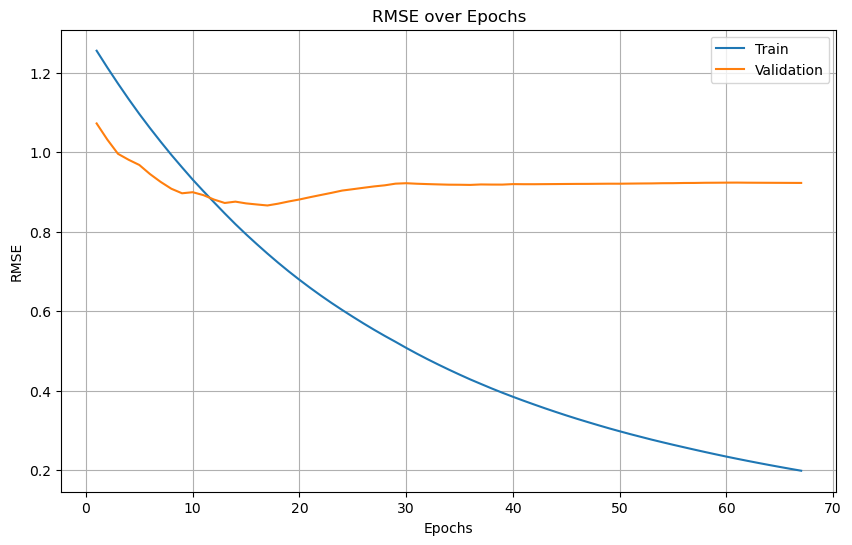

RMSE cuối cùng trên tập huấn luyện: 0.19889415905205696
RMSE cuối cùng trên tập xác thực: 0.9230543521951879


In [40]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel

# Giả định có dữ liệu X_train, X_val, X_test và y_train, y_val, y_test đã được định nghĩa trước

# Vô hiệu hóa các cảnh báo liên quan đến đặc trưng
warnings.filterwarnings("ignore", category=UserWarning)

# Huấn luyện mô hình hồi quy XGBoost trên toàn bộ dữ liệu huấn luyện
model = XGBRegressor(tree_method='hist', device='cuda')

# Lấy tầm quan trọng của các đặc trưng
model.fit(X_train, y_train)

feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
num_features = len(sorted_indices)
num_selected_features = min(12, num_features)
best_threshold = feature_importances[sorted_indices[num_selected_features - 1]]

selection = SelectFromModel(model, threshold=best_threshold, prefit=True)
select_X_train = selection.transform(X_train)
select_X_val = selection.transform(X_val)
select_X_test = selection.transform(X_test)

# Cung cấp các siêu tham số tối ưu
best_params = {
    'learning_rate': 0.08805545660642229,
    'max_depth': 10,
    'min_child_weight': 1,
    'n_estimators': 500,
    # Thêm các siêu tham số khác nếu có
}

# Huấn luyện mô hình hồi quy XGBoost cuối cùng với early stopping
eval_set = [(select_X_train, y_train), (select_X_val, y_val)]
eval_metric = "rmse"

final_model = XGBRegressor(tree_method='hist', device='cuda', **best_params)

final_model.fit(select_X_train, y_train, 
                eval_metric=eval_metric, 
                eval_set=eval_set, 
                early_stopping_rounds=50,  # Dừng sau 50 vòng lặp nếu không cải thiện
                verbose=False)  # Tắt in thông tin vòng lặp để gọn gàng

# Lấy thông tin về các metrics trên từng epoch
results = final_model.evals_result()

# Biến đổi các metric thành numpy arrays
train_rmse = np.sqrt(results['validation_0']['rmse'])
val_rmse = np.sqrt(results['validation_1']['rmse'])
epochs = range(1, len(train_rmse) + 1)

# Vẽ biểu đồ line theo từng epoch
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_rmse, label='Train')
plt.plot(epochs, val_rmse, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('RMSE over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# In ra các độ đo cuối cùng
final_train_rmse = train_rmse[-1]
final_val_rmse = val_rmse[-1]

print("RMSE cuối cùng trên tập huấn luyện:", final_train_rmse)
print("RMSE cuối cùng trên tập xác thực:", final_val_rmse)


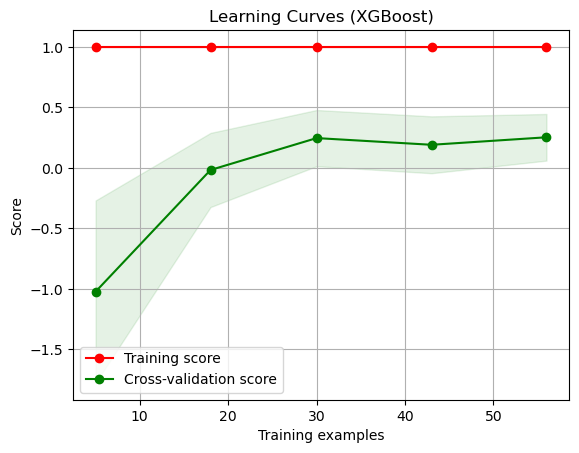

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from xgboost import XGBRegressor

# Assuming you have defined X_train, X_val, y_train, y_val beforehand

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='r2')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Example usage with XGBoost
title_xgb = "Learning Curves (XGBoost)"
estimator_xgb = XGBRegressor(tree_method='hist', device='gpu')
plot_learning_curve(estimator_xgb, title_xgb, X_train, y_train, cv=5, n_jobs=-1)
plt.show()


test

In [13]:
# Calculate adjusted R²
n_samples = select_X_val.shape[0]
n_features = select_X_val.shape[1]
adj_r2_train = 1 - (1 - train_r2) * (n_samples - 1) / (n_samples - n_features - 1)

n_samples = select_X_val.shape[0]
n_features = select_X_val.shape[1]
adj_r2_val = 1 - (1 - val_r2) * (n_samples - 1) / (n_samples - n_features - 1)

n_samples = select_X_test.shape[0]
n_features = select_X_test.shape[1]
adj_r2_test = 1 - (1 - test_r2) * (n_samples - 1) / (n_samples - n_features - 1)

print("Adjusted R² on training set:", adj_r2_train)
print("Adjusted R² on validation set:", adj_r2_val)
print("Adjusted R² on test set:", adj_r2_test)


Adjusted R² on training set: 0.9999395181807004
Adjusted R² on validation set: 0.99839228471982
Adjusted R² on test set: 0.9985682104291025


In [18]:
# Đánh giá trên tập test
test_predictions = final_model.predict(select_X_test)
test_r2 = r2_score(y_test, test_predictions)
test_n = select_X_test.shape[0]
test_p = select_X_test.shape[1]
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

# Tính Mean Absolute Error (MAE)
mae_test = mean_absolute_error(y_test, test_predictions)

# Tính Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, test_predictions)

# Tính Root Mean Squared Error (RMSE)
rmse_test = np.sqrt(mse_test)

# In kết quả
print("Adjusted R² on test set:", test_adj_r2)
print("Mean Absolute Error on test set:", mae_test)
print("Mean Squared Error on test set:", mse_test)
print("Root Mean Squared Error on test set:", rmse_test)


Adjusted R² on test set: 0.9985682104291025
Mean Absolute Error on test set: 0.0667338368320554
Mean Squared Error on test set: 0.042282131358434616
Root Mean Squared Error on test set: 0.205626193269327


Biểu đồ phần dư

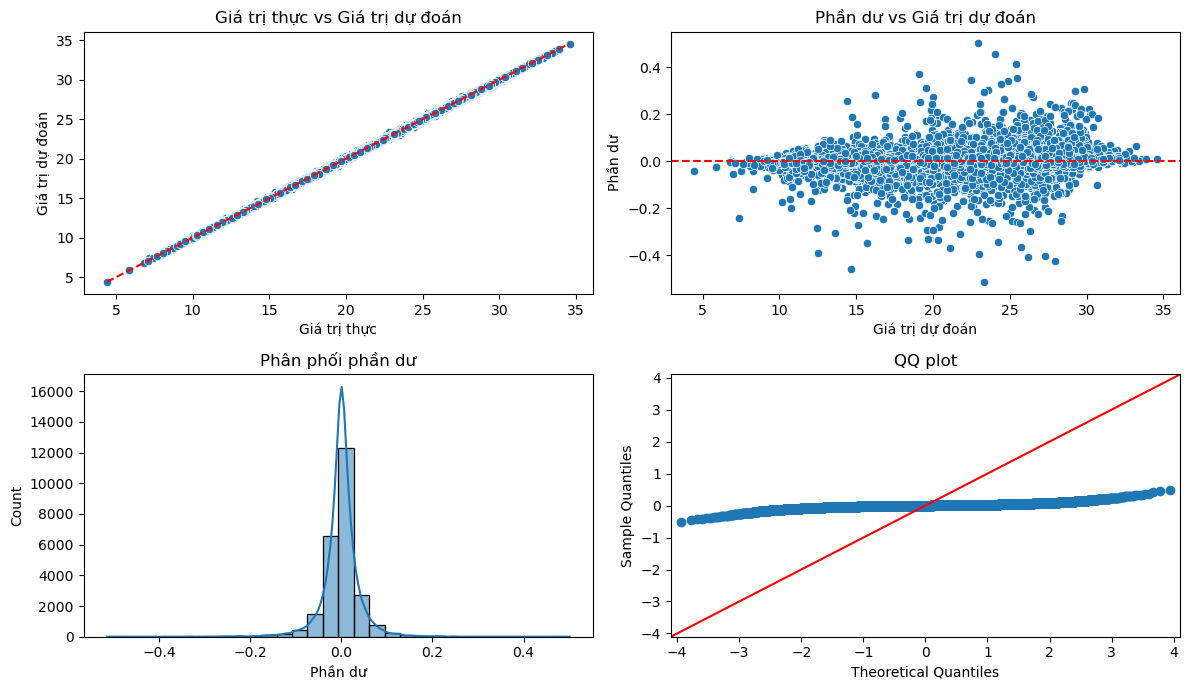

In [14]:
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import statsmodels.api as sm

# Giả sử 'final_model' là đối tượng mô hình của bạn
# select_X_train và y_train là dữ liệu huấn luyện mà bạn đã sử dụng để tạo mô hình

# Tùy chọn in
np.set_printoptions(threshold=10000)

# Các giá trị dự đoán
fitted_values = final_model.predict(select_X_train)
#print(fitted_values)

# Các giá trị phần dư
residuals = y_train - fitted_values
#print(residuals)

# Thiết lập vẽ biểu đồ
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

# Biểu đồ giá trị thực so với giá trị dự đoán
sns.scatterplot(x=y_train, y=fitted_values, ax=axs[0, 0])
axs[0, 0].set_xlabel('Giá trị thực')
axs[0, 0].set_ylabel('Giá trị dự đoán')
axs[0, 0].set_title('Giá trị thực vs Giá trị dự đoán')
axs[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')

# Biểu đồ phần dư
sns.scatterplot(x=fitted_values, y=residuals, ax=axs[0, 1])
axs[0, 1].set_xlabel('Giá trị dự đoán')
axs[0, 1].set_ylabel('Phần dư')
axs[0, 1].set_title('Phần dư vs Giá trị dự đoán')
axs[0, 1].axhline(0, color='red', linestyle='--')

# Biểu đồ phân phối phần dư
sns.histplot(residuals, bins=30, kde=True, ax=axs[1, 0])
axs[1, 0].set_xlabel('Phần dư')
axs[1, 0].set_title('Phân phối phần dư')

# QQ plot
sm.qqplot(residuals, line ='45', ax=axs[1, 1])
axs[1, 1].set_title('QQ plot')

plt.tight_layout()
plt.show()
